# Calculating Beta of a Stock Using Linear Regression (Monthly for last 4 years)

In [1]:
import numpy as np
import pandas_datareader as reader
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
end=dt.datetime.now()
start=dt.date(end.year -4, end.month, end.day)
#print(start)
stock= ['ITC.NS','NS']

## Using pandas-datareader

In [3]:
df=reader.get_data_yahoo(stock,start,end)['Adj Close']

In [4]:
df

Symbols,ITC.NS,NS
Date,,
2017-09-28,NaN,26.347599
2017-09-29,224.804916,26.576763
2017-10-02,NaN,26.550575
2017-10-03,227.502914,26.616047
2017-10-04,232.724869,26.452362
...,...,...
2021-09-22,243.500000,15.160000
2021-09-23,242.500000,15.990000
2021-09-24,238.449997,15.810000


## Using Yahoo Finance

In [5]:
data=yf.download(stock,start,end)['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [6]:
data.rename(columns={'ITC.NS':'ITC'}, inplace=True)

In [7]:
data=data.resample('M').ffill() #Forward fill the empty values and resample monthly
data=data.dropna(axis=0) #Drop row containing NaN
data.head()

,ITC,NS
Date,,
2017-09-30,224.804916,26.576763
2017-10-31,231.245346,21.803553
2017-11-30,222.846664,19.677341
2017-12-31,229.113022,20.279987
2018-01-31,236.206161,22.561911


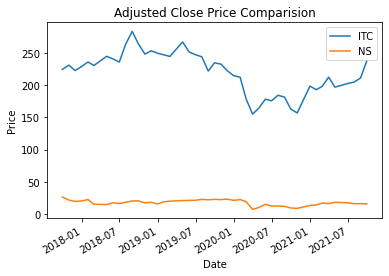

In [8]:
data.plot()
plt.ylabel('Price')
plt.title('Adjusted Close Price Comparision')
plt.show()

## Calculating Cumulative Daily Returns

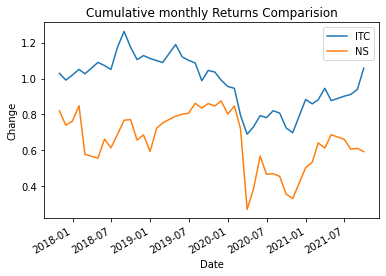

In [9]:
monthly_ret=data.pct_change() #calculates change
monthly_cum_ret=(monthly_ret+1).cumprod() #calculates cumulative monthly returns
monthly_cum_ret=monthly_cum_ret.dropna(axis=0)
monthly_cum_ret
monthly_cum_ret.plot()
plt.ylabel('Change')
plt.title('Cumulative monthly Returns Comparision')
plt.show()

## Plotting A Scatter Plot

Text(0, 0.5, 'ITC')

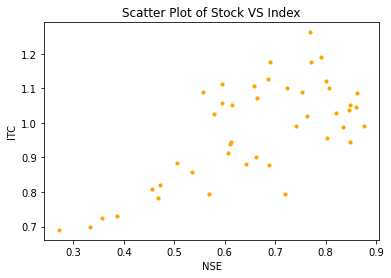

In [10]:
x=monthly_cum_ret.NS
y=monthly_cum_ret.ITC
plt.scatter(x,y,s=10,c='orange')
plt.title('Scatter Plot of Stock VS Index')
plt.xlabel('NSE')
plt.ylabel('ITC')

## Building A Regression Model

In [11]:
model=np.polyfit(x,y,1)
#model outputs an array with the elements as [Beta,Alpha]
Beta=float(model[0])
Alpha=float(model[1])

## Plotting The Regression Line

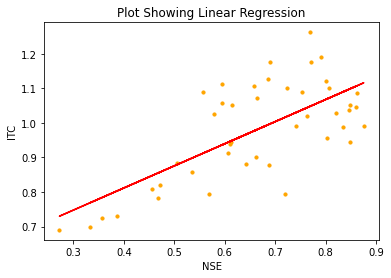

Beta of the stock is  0.639416556410217
Alpha of the stock is  0.5558493078671978


In [12]:
y1=(Beta*x)+Alpha #Value of y based on the model

plt.plot(x,y1,c='red')
plt.scatter(x,y,s=10,c='orange')
plt.title('Plot Showing Linear Regression')
plt.xlabel('NSE')
plt.ylabel('ITC')
plt.show()
print('Beta of the stock is ',Beta)
print('Alpha of the stock is ',Alpha)
